In [1]:
import pandas as pd
import numpy as np
import os

In [3]:
parameters = ["Age" , "workclass" , "fnlwgt" , "education" , "education-num" , "marital-status" , "occupation" , 
              "relationship" , "race" , "sex" , "capital-gain" , "capital-loss" , "hours-per-week" , "native-country", "income"]
print(os.getcwd())
df = pd.read_csv("adult.data", index_col=False, names=parameters)

df

/content


,Age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [21]:
# from google.colab import drive
# drive.mount('/content/drive')
df = pd.read_csv("drive/MyDrive/adult.data", index_col=False, names=parameters)

<Axes: title={'center': 'hello'}, ylabel='Frequency'>

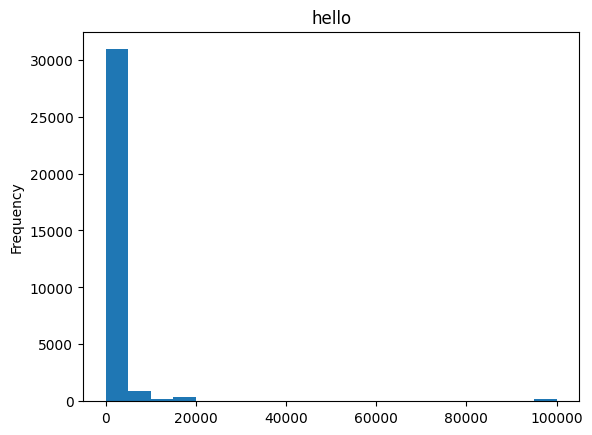

In [20]:
df["capital-gain"].plot.hist(bins=20)

# Intro
The goal of this notebook is to analyze this dataset. I do not have specific thoughts on what we are looking at, but this should should be pretty open-ended.

I think that an assumption we made is that sex would be important in determining whether an individual made capital gains >= $50000. We don't know if this is the case and we can look at this assumption in the notebook.

Questions:


*   For each group (categorized by race or sex), what percentage do they make up for those that make above and below $50000
*   What about other groupings?



# Question: Proportions for >= and < $50000 in Income


Figure out the percentage/proportion of people above and below $50000 in Income. 

## Question 1: Proportion by Race

In [4]:
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
#https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html

#you will need to know conceptually how groupby and value_counts() work
#you may or may not be able to use the function provided by pandas, or have to make your own version.

percentage of racial groups with income <=50000:
                   race  percentage
0   Amer-Indian-Eskimo   88.424437
1   Asian-Pac-Islander   73.435996
2                Black   87.612036
3                Other   90.774908
4                White   74.414006 


percentage of racial groups with income >50000:
                   race  percentage
0   Amer-Indian-Eskimo   11.575563
1   Asian-Pac-Islander   26.564004
2                Black   12.387964
3                Other    9.225092
4                White   25.585994


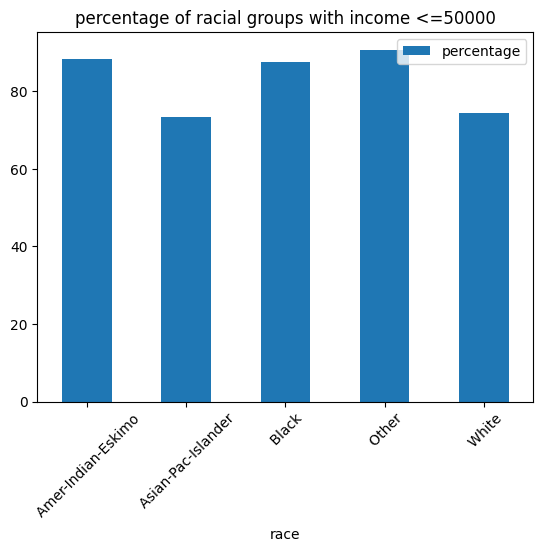

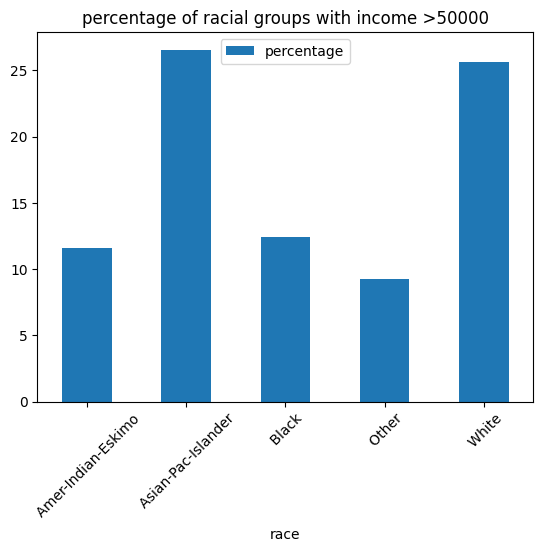

In [35]:
y = df[df.columns[-1]]
class_weights = df.value_counts(normalize=True).to_dict()

# for each race, count the number of people above and below 50K in income

# proportion by race with income <=50000
race_lte_5K = df.groupby('race').apply(lambda x: ((x['income'] == " <=50K").sum() / len(x))*100).reset_index(name='percentage')
# proportion by race with income >50000
race_gt_5K = df.groupby('race').apply(lambda x: ((x['income'] == " >50K").sum() / len(x))*100).reset_index(name='percentage')

race_lte_5K.plot.bar(x='race', y='percentage', rot=45, title="percentage of racial groups with income <=50000")
race_gt_5K.plot.bar(x='race', y='percentage', rot=45, title="percentage of racial groups with income >50000")

print('percentage of racial groups with income <=50000:\n',race_lte_5K, '\n')
print('\npercentage of racial groups with income >50000:\n',race_gt_5K)


In [6]:
# proportion by race with income <=50000
race_lte_5K = df.groupby('race').apply(lambda x: ((x['income'] == " <=50K").sum() / len(x))*100).reset_index(name='percentage')
# proportion by race with income >50000
race_gt_5K = df.groupby('race').apply(lambda x: ((x['income'] == " >50K").sum() / len(x))*100).reset_index(name='percentage')

print('percentage of racial groups with income <=50000:\n',race_lte_5K, '\n')
print('\npercentage of racial groups with income >50000:\n',race_gt_5K)

percentage of racial groups with income <=50000:
                   race  percentage
0   Amer-Indian-Eskimo   88.424437
1   Asian-Pac-Islander   73.435996
2                Black   87.612036
3                Other   90.774908
4                White   74.414006 


percentage of racial groups with income >50000:
                   race  percentage
0   Amer-Indian-Eskimo   11.575563
1   Asian-Pac-Islander   26.564004
2                Black   12.387964
3                Other    9.225092
4                White   25.585994


## Question 2: Proportion by Sex

percentage of each sex with income <=50000:
        sex  percentage
0   Female   89.053941
1     Male   69.426342 


percentage of each sex with income >50000:
        sex  percentage
0   Female   10.946059
1     Male   30.573658


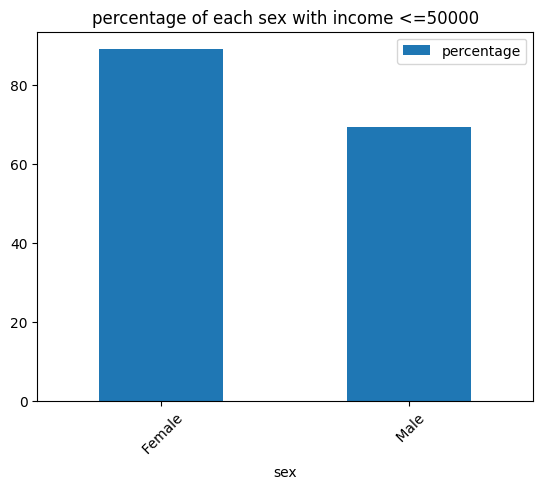

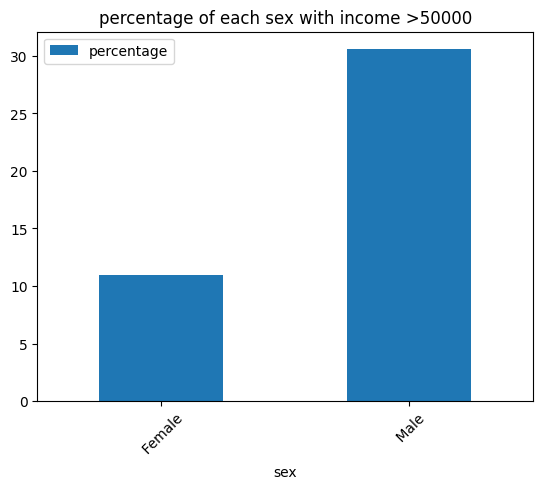

In [36]:
# for each sex, count the number of people above and below 50K in income

# proportion by race with income <=50000
sex_lte_5K = df.groupby('sex').apply(lambda x: ((x['income'] == " <=50K").sum() / len(x))*100).reset_index(name='percentage')
# proportion by race with income >50000
sex_gt_5K = df.groupby('sex').apply(lambda x: ((x['income'] == " >50K").sum() / len(x))*100).reset_index(name='percentage')

sex_lte_5K.plot.bar(x='sex', y='percentage', rot=45, title="percentage of each sex with income <=50000")
sex_gt_5K.plot.bar(x='sex', y='percentage', rot=45, title="percentage of each sex with income >50000")

print('percentage of each sex with income <=50000:\n',sex_lte_5K, '\n')
print('\npercentage of each sex with income >50000:\n',sex_gt_5K)


## Question 3: Proportion by Race and Gender

In [16]:
# for each race, sex count the number of people above and below 50K in capital gains

# proportion by race with income <=50000
race_sex_lte_5K = df.groupby(['race', 'sex']).apply(lambda x: ((x['income'] == " <=50K").sum()/len(x))*100).reset_index(name='percentage')
# proportion by race with income >50000
race_sex_gt_5K = df.groupby(['race', 'sex']).apply(lambda x: ((x['income'] == " >50K").sum()/len(x))*100).reset_index(name='percentage')

print('percentage of race, sex groups with income <=50000:\n',race_sex_lte_5K, '\n')
print('\npercentage of race, sex groups with income >50000:\n',race_sex_gt_5K)


percentage of race, sex groups with income <=50000:
                   race      sex  percentage
0   Amer-Indian-Eskimo   Female   89.915966
1   Amer-Indian-Eskimo     Male   87.500000
2   Asian-Pac-Islander   Female   87.572254
3   Asian-Pac-Islander     Male   66.378066
4                Black   Female   94.212219
5                Black     Male   81.070746
6                Other   Female   94.495413
7                Other     Male   88.271605
8                White   Female   88.104605
9                White     Male   68.243455 


percentage of race, sex groups with income >50000:
                   race      sex  percentage
0   Amer-Indian-Eskimo   Female   10.084034
1   Amer-Indian-Eskimo     Male   12.500000
2   Asian-Pac-Islander   Female   12.427746
3   Asian-Pac-Islander     Male   33.621934
4                Black   Female    5.787781
5                Black     Male   18.929254
6                Other   Female    5.504587
7                Other     Male   11.728395
8           

## Question 4: Racial Distribution

racial distribution:
                   race  percentage
0   Amer-Indian-Eskimo    0.955130
1   Asian-Pac-Islander    3.190934
2                Black    9.594300
3                Other    0.832284
4                White   85.427352


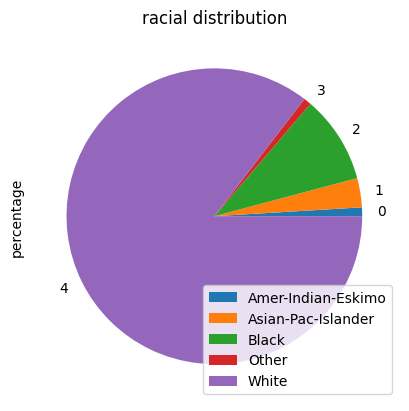

In [48]:
# for each race, calculate the racial distribution across the entire dataset

racial_dist = df.groupby(['race']).apply(lambda x: (x['race'].count() / df.shape[0])*100).reset_index(name='percentage')

chart = racial_dist.plot.pie(y='percentage', title="racial distribution")
chart.legend(['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White'], loc=4)

print('racial distribution:\n',racial_dist)

## Question 5: Sex Distribution

sex distribution:
        sex  percentage
0   Female   33.079451
1     Male   66.920549


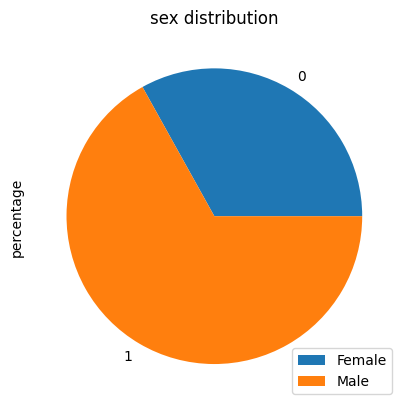

In [46]:
# for each sex, calculate the sex distribution across the entire dataset

sex_dist = df.groupby(['sex']).apply(lambda x: (x['sex'].count() / df.shape[0])*100).reset_index(name='percentage')

chart = sex_dist.plot.pie(y='percentage', title="sex distribution")
chart.legend(['Female', 'Male'], loc=4)

print('sex distribution:\n',sex_dist)